# Data Quality Check and Exploratory Data Analysis

In [55]:
import os
import json
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import folium
import numpy as np
from scipy.stats import zscore

## Load data from JSON Files

In [56]:
# Specify the folder containing JSON files
json_folder = '../resources'

# Get all JSON files in the folder
json_files = glob(os.path.join(json_folder, '*.json'))
print(f"Found {len(json_files)} JSON files.")

# Load all JSON files into a list
data_list = []
if json_files:
    for json_file in json_files:
        with open(json_file, 'r') as file:
            data = json.load(file)
            data_list.append(data)
            print(f"Loaded file: {json_file}")
else:
    print("No JSON files found.")

# Display the number of loaded files
print(f"Loaded data from {len(data_list)} files.")

Found 4 JSON files.
Loaded file: ../resources/users.json
Loaded file: ../resources/payments.json
Loaded file: ../resources/chargers.json
Loaded file: ../resources/transactions.json
Loaded data from 4 files.


## Inspect the Data Structure

In [57]:
# Inspect the structure of all entries in the list
for idx, data in enumerate(data_list):
    print(f"\nInspecting file {idx + 1}/{len(data_list)}:")

    # Check the type of the data
    if isinstance(data, list):
        print(f"The JSON file contains a list of {len(data)} records.")
        # Display the first record
        print("First record:")
        print(data[0])
    elif isinstance(data, dict):
        print("The JSON file contains a dictionary.")
        print("Keys:", data.keys())
    else:
        print("Unknown JSON structure.")


Inspecting file 1/4:
The JSON file contains a list of 2000 records.
First record:
{'user_id': 'user_1', 'name': 'Mr. Marcus Buckridge', 'email': 'Queenie26@yahoo.com', 'tier': 'guest', 'created_at': '2023-06-25T19:14:29.518Z'}

Inspecting file 2/4:
The JSON file contains a list of 91876 records.
First record:
{'payment_id': 'payment_1', 'session_id': 'session_1', 'user_id': 'user_493', 'amount': 4.73, 'currency': 'CHF'}

Inspecting file 3/4:
The JSON file contains a list of 3000 records.
First record:
{'charger_id': 'charger_1', 'city': 'Lausanne', 'location': {'lat': 46.533429, 'lon': 6.642148}, 'installed_at': '2023-03-26T15:50:52.566Z'}

Inspecting file 4/4:
The JSON file contains a list of 100000 records.
First record:
{'session_id': 'session_1', 'user_id': 'user_493', 'charger_id': 'charger_837', 'start_time': '2025-01-11T09:44:27.416Z', 'end_time': '2025-01-11T10:41:27.416Z', 'kWh_consumed': 9.46, 'payment_method': 'app_wallet', 'status': 'completed'}


## Read from JSON into DataFrame

In [58]:
# Convert the JSON data to a list of Pandas DataFrames for analysis
dataframes = []  # List to store DataFrames for each JSON file

for idx, data in enumerate(data_list):
    print(f"\nProcessing file {idx + 1}/{len(data_list)}:")
    
    if isinstance(data, list):
        print(f"The JSON file contains a list of {len(data)} records.")
        df = pd.DataFrame(data)  # Convert the list to a DataFrame
        dataframes.append(df)  # Add the DataFrame to the list
    elif isinstance(data, dict):
        print("The JSON file contains a dictionary. Converting it to a single-row DataFrame.")
        df = pd.DataFrame([data])  # Convert the dictionary to a single-row DataFrame
        dataframes.append(df)  # Add the DataFrame to the list
    else:
        print("Unknown JSON structure. Skipping this file.")

# Display the number of DataFrames created
print(f"Created {len(dataframes)} DataFrames.")

#pd.set_option('display.max_rows', 3000)
# Optionally, display the first few rows of each DataFrame
for idx, df in enumerate(dataframes):
    print(f"\nDataFrame {idx + 1}:")
    display(df.head())


Processing file 1/4:
The JSON file contains a list of 2000 records.

Processing file 2/4:
The JSON file contains a list of 91876 records.

Processing file 3/4:
The JSON file contains a list of 3000 records.

Processing file 4/4:
The JSON file contains a list of 100000 records.
Created 4 DataFrames.

DataFrame 1:


user_id                  name                        email   tier  \
0  user_1  Mr. Marcus Buckridge          Queenie26@yahoo.com  guest   
1  user_2        Tracy Bins DDS  Cristal.Padberg@hotmail.com  guest   
2  user_3          Saul Goldner  Percy.Greenholt@hotmail.com  guest   
3  user_4         Vicky Stanton      Rita_Bailey46@gmail.com  guest   
4  user_5  Clifford Breitenberg        Nina_OKeefe@yahoo.com  guest   

                 created_at  
0  2023-06-25T19:14:29.518Z  
1  2024-11-14T07:26:25.333Z  
2  2023-08-05T17:58:05.258Z  
3  2025-02-28T19:13:56.529Z  
4  2024-12-18T22:39:07.496Z


DataFrame 2:


payment_id session_id    user_id  amount currency
0  payment_1  session_1   user_493    4.73      CHF
1  payment_2  session_2   user_189   10.24      CHF
2  payment_3  session_3    user_59    2.46      CHF
3  payment_4  session_4   user_274   14.38      CHF
4  payment_5  session_5  user_1825    7.83      CHF


DataFrame 3:


charger_id      city                             location  \
0  charger_1  Lausanne  {'lat': 46.533429, 'lon': 6.642148}   
1  charger_2   Lucerne  {'lat': 47.037157, 'lon': 8.320008}   
2  charger_3      Bern  {'lat': 46.957913, 'lon': 7.453251}   
3  charger_4   Lucerne  {'lat': 47.060813, 'lon': 8.312696}   
4  charger_5    Lugano  {'lat': 46.011992, 'lon': 8.957525}   

               installed_at  
0  2023-03-26T15:50:52.566Z  
1  2022-10-08T10:00:41.109Z  
2  2024-02-25T12:49:48.493Z  
3  2023-08-08T15:48:04.505Z  
4  2023-03-08T15:45:43.325Z


DataFrame 4:


session_id    user_id    charger_id                start_time  \
0  session_1   user_493   charger_837  2025-01-11T09:44:27.416Z   
1  session_2   user_189  charger_1355  2025-04-18T12:48:06.929Z   
2  session_3    user_59  charger_2814  2025-03-15T16:04:13.267Z   
3  session_4   user_274  charger_1930  2025-03-29T15:34:14.324Z   
4  session_5  user_1825  charger_2625  2025-04-23T04:42:51.722Z   

                   end_time  kWh_consumed payment_method     status  
0  2025-01-11T10:41:27.416Z          9.46     app_wallet  completed  
1  2025-04-18T14:31:06.929Z         20.49           card  completed  
2  2025-03-15T16:21:13.267Z          4.91     app_wallet  completed  
3  2025-03-29T17:12:14.324Z         28.75           card  completed  
4  2025-04-23T05:36:51.722Z         15.67     app_wallet  completed

## Validate and Clean Data

In [59]:
# Loop through all DataFrames in the `dataframes` list
for i, df in enumerate(dataframes):
    print(f"\nValidating DataFrame {i}:\n{'-' * 40}")
    
    # Check for missing values
    print("Missing values per column:")
    print(df.isnull().sum())

    # Check for duplicate records
    try:
        # Identify columns with unhashable types (e.g., dictionaries)
        unhashable_columns = [col for col in df.columns if df[col].apply(type).eq(dict).any()]
        if unhashable_columns:
            print(f"Columns with unhashable types (e.g., dict): {unhashable_columns}")
            
            # Create a temporary DataFrame for duplicate detection
            temp_df = df.copy()
            for col in unhashable_columns:
                temp_df[col] = temp_df[col].apply(lambda x: str(x) if isinstance(x, dict) else x)

            # Check for duplicate records in the temporary DataFrame
            duplicate_count = temp_df.duplicated().sum()
            print(f"Number of duplicate records: {duplicate_count}")

            # Drop duplicate rows in the original DataFrame
            df_cleaned = df[~temp_df.duplicated()]
            print(f"DataFrame after dropping duplicates has {len(df_cleaned)} records.")
        else:
            # If no unhashable columns, check duplicates directly
            duplicate_count = df.duplicated().sum()
            print(f"Number of duplicate records: {duplicate_count}")

            # Drop duplicate rows
            df_cleaned = df.drop_duplicates()
            print(f"DataFrame after dropping duplicates has {len(df_cleaned)} records.")

    except Exception as e:
        print(f"Error processing DataFrame {i}: {e}")


Validating DataFrame 0:
----------------------------------------
Missing values per column:
user_id       0
name          0
email         0
tier          0
created_at    0
dtype: int64
Number of duplicate records: 0
DataFrame after dropping duplicates has 2000 records.

Validating DataFrame 1:
----------------------------------------
Missing values per column:
payment_id    0
session_id    0
user_id       0
amount        0
currency      0
dtype: int64
Number of duplicate records: 0
DataFrame after dropping duplicates has 91876 records.

Validating DataFrame 2:
----------------------------------------
Missing values per column:
charger_id      0
city            0
location        0
installed_at    0
dtype: int64
Columns with unhashable types (e.g., dict): ['location']
Number of duplicate records: 0
DataFrame after dropping duplicates has 3000 records.

Validating DataFrame 3:
----------------------------------------
Missing values per column:
session_id           0
user_id              

## Save Cleaned Data -> not necessary, nothing cleaned

## Users per Tier

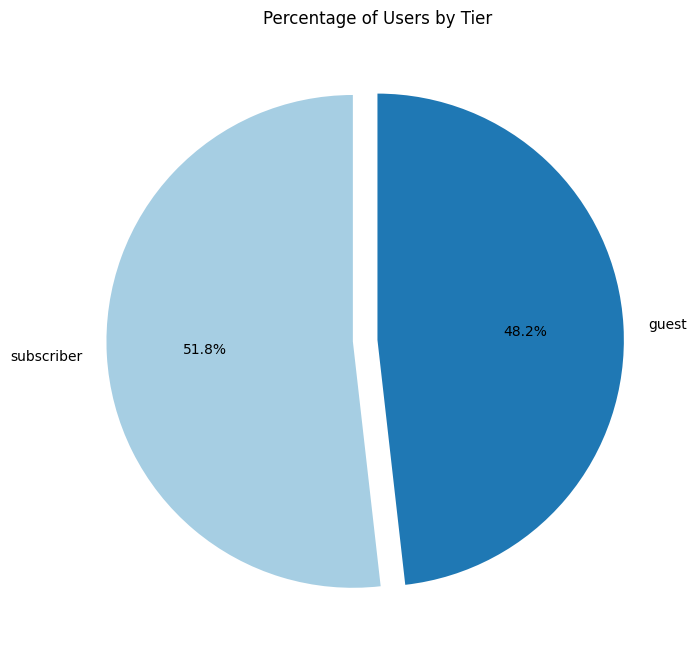

In [60]:
import matplotlib.pyplot as plt

# Ensure DataFrame 1 exists in the list of DataFrames
if len(dataframes) >= 1:
    users = dataframes[0]  # DataFrame 1 (index 0 in the list)

    # Check if the 'tier' column exists in DataFrame 1
    if 'tier' in users.columns:
        # Count the number of users in each tier
        tier_counts = users['tier'].value_counts()

        # Create a pie chart
        plt.figure(figsize=(8, 8))
        tier_counts.plot(
            kind='pie',
            autopct='%1.1f%%',  # Display percentages with one decimal place
            startangle=90,      # Start the pie chart at 90 degrees
            colors=plt.cm.Paired.colors,  # Use a color palette
            labels=tier_counts.index,     # Use tier names as labels
            explode=[0.1 if i == tier_counts.idxmax() else 0 for i in tier_counts.index]  # Highlight the largest slice
        )
        plt.title('Percentage of Users by Tier')
        plt.ylabel('')  # Remove the y-axis label for a cleaner look
        plt.show()
    else:
        print("The 'tier' column does not exist in DataFrame 1.")
else:
    print("DataFrame 1 does not exist in the list of DataFrames.")

Number of discarded entries (non-CHF): 0


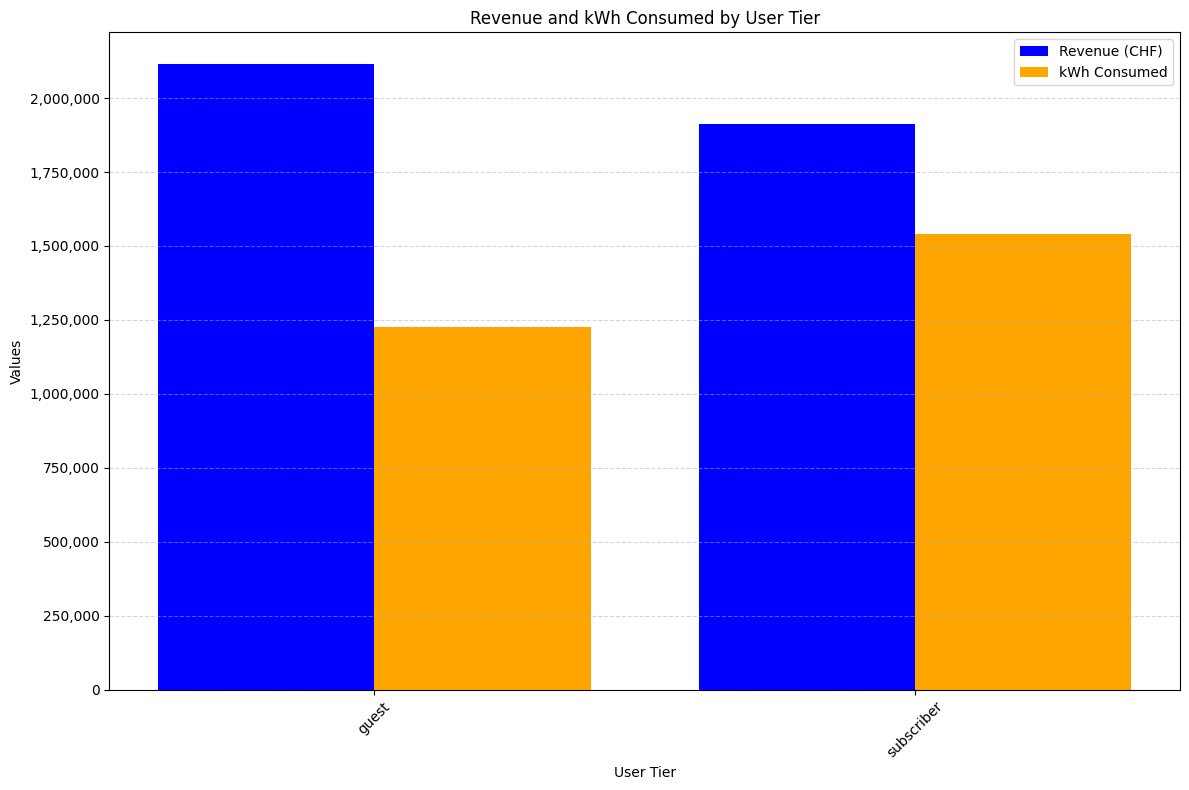

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Ensure DataFrames 0, 2, and 4 exist in the list of DataFrames
if len(dataframes) >= 4:
    users = dataframes[0]  # DataFrame 0
    payments = dataframes[1]  # DataFrame 2
    transactions = dataframes[3]  # DataFrame 4

    # Check if all required columns exist in the respective DataFrames
    if 'user_id' in users.columns and 'tier' in users.columns and \
       'user_id' in transactions.columns and 'session_id' in transactions.columns and \
       'session_id' in payments.columns and 'amount' in payments.columns and \
       'currency' in payments.columns and 'kWh_consumed' in transactions.columns:
        try:
            # Merge transactions with users on 'user_id'
            transactions_with_users = transactions.merge(users, on='user_id', how='inner')

            # Merge the result with payments on 'session_id'
            transactions_with_payments = transactions_with_users.merge(payments, on='session_id', how='inner')

            # Filter transactions to include only those with currency CHF
            transactions_chf = transactions_with_payments[transactions_with_payments['currency'] == 'CHF']
            discarded_entries = len(transactions_with_payments) - len(transactions_chf)
            print(f"Number of discarded entries (non-CHF): {discarded_entries}")

            # Group by user tier and calculate total revenue (amount) and total kWh consumed
            tier_stats = transactions_chf.groupby('tier')[['amount', 'kWh_consumed']].sum().reset_index()

            # Plot the grouped bar chart
            plt.figure(figsize=(12, 8))
            bar_width = 0.4  # Width of each bar
            x = range(len(tier_stats['tier']))  # X-axis positions

            # Plot revenue in CHF
            plt.bar([pos - bar_width / 2 for pos in x], tier_stats['amount'], width=bar_width, color='blue', label='Revenue (CHF)')

            # Plot kWh consumed
            plt.bar([pos + bar_width / 2 for pos in x], tier_stats['kWh_consumed'], width=bar_width, color='orange', label='kWh Consumed')

            # Add labels and title
            plt.title('Revenue and kWh Consumed by User Tier')
            plt.xlabel('User Tier')
            plt.ylabel('Values')
            plt.xticks(x, tier_stats['tier'], rotation=45)  # Set tier names as x-axis labels
            plt.legend()
            plt.grid(axis='y', linestyle='--', alpha=0.5)

            # Format Y-axis to show actual values
            formatter = FuncFormatter(lambda x, _: f'{int(x):,}')  # Format numbers with commas
            plt.gca().yaxis.set_major_formatter(formatter)

            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error creating the plot: {e}")
    else:
        print("Required columns ('user_id', 'tier', 'session_id', 'amount', 'currency', 'kWh_consumed' in DataFrames 0, 2, and 4) are missing.")
else:
    print("DataFrames 0, 2, and 4 do not exist in the list of DataFrames.")

## Distribution of Payment Methods

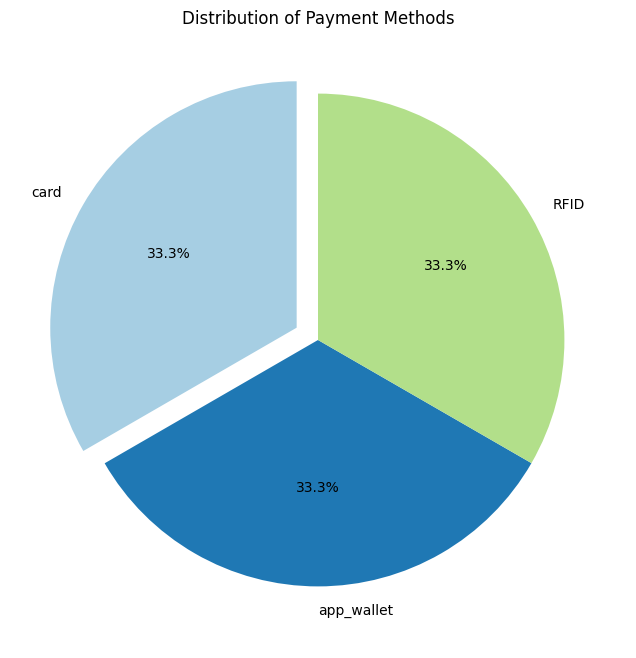

In [62]:
import matplotlib.pyplot as plt

# Ensure the last DataFrame exists in the list of DataFrames
if len(dataframes) > 0:
    transactions = dataframes[3]  # Get the last DataFrame in the list

    # Check if the 'payment_method' column exists in the last DataFrame
    if 'payment_method' in transactions.columns:
        # Count the number of occurrences of each payment method
        payment_counts = transactions['payment_method'].value_counts()

        # Create a pie chart
        plt.figure(figsize=(8, 8))
        payment_counts.plot(
            kind='pie',
            autopct='%1.1f%%',  # Display percentages with one decimal place
            startangle=90,      # Start the pie chart at 90 degrees
            colors=plt.cm.Paired.colors,  # Use a color palette
            labels=payment_counts.index,  # Use payment method names as labels
            explode=[0.1 if i == payment_counts.idxmax() else 0 for i in payment_counts.index]  # Highlight the largest slice
        )
        plt.title('Distribution of Payment Methods')
        plt.ylabel('')  # Remove the y-axis label for a cleaner look
        plt.show()
    else:
        print("The 'payment_method' column does not exist in the last DataFrame.")
else:
    print("The list of DataFrames is empty.")

## Number of Chargers per City (Inconsistent City Names)

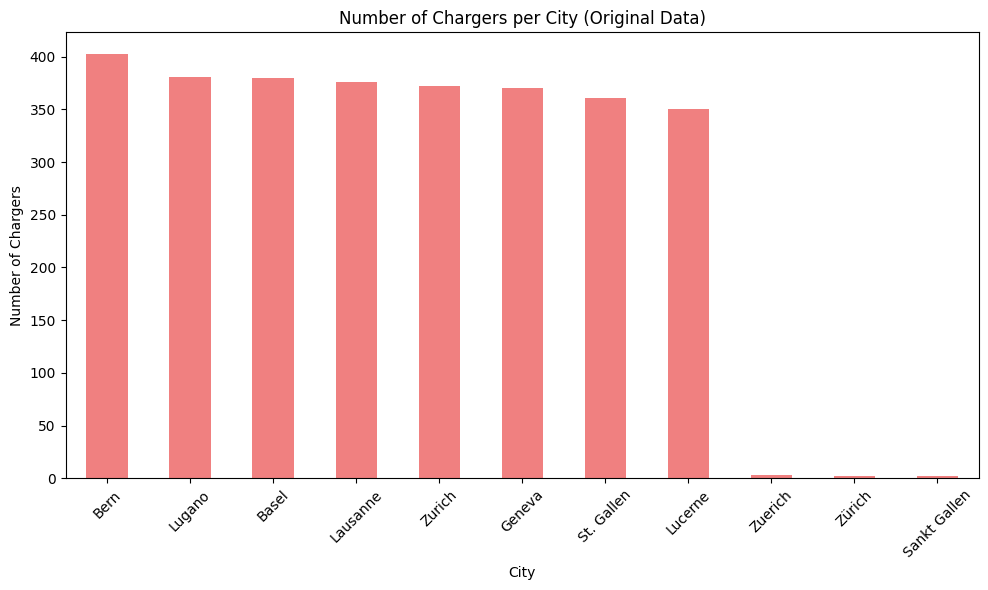

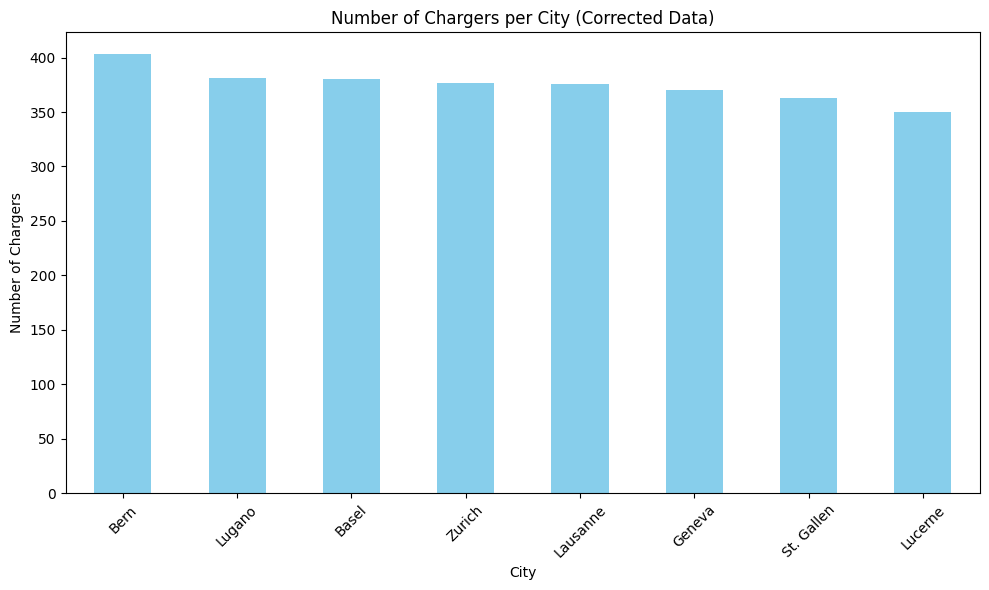

In [63]:
# Ensure DataFrame 3 exists in the list of DataFrames
if len(dataframes) >= 3:
    chargers = dataframes[2]  # DataFrame 3 (index 2 in the list)

    # Check if the 'city' column exists in DataFrame 3
    if 'city' in chargers.columns:
        # Plot the original graph with inconsistent city names
        city_counts_original = chargers['city'].value_counts()
        plt.figure(figsize=(10, 6))
        city_counts_original.plot(kind='bar', color='lightcoral')
        plt.title('Number of Chargers per City (Original Data)')
        plt.xlabel('City')
        plt.ylabel('Number of Chargers')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Define a mapping of alternative spellings to standardized city names
        city_mapping = {
            'Sankt Gallen': 'St. Gallen',
            'St. Gallen': 'St. Gallen',
            'Zürich': 'Zurich',
            'Zuerich': 'Zurich',
            'Zurich': 'Zurich'
        }

        # Replace alternative spellings with standardized names
        chargers['city'] = chargers['city'].replace(city_mapping)

        # Plot the corrected graph with standardized city names
        city_counts_corrected = chargers['city'].value_counts()
        plt.figure(figsize=(10, 6))
        city_counts_corrected.plot(kind='bar', color='skyblue')
        plt.title('Number of Chargers per City (Corrected Data)')
        plt.xlabel('City')
        plt.ylabel('Number of Chargers')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    else:
        print("The 'city' column does not exist in DataFrame 3.")
else:
    print("DataFrame 3 does not exist in the list of DataFrames.")

## Location of Chargers (Inconsistent Locations)

In [64]:
# Ensure DataFrame 3 exists in the list of DataFrames
if len(dataframes) >= 3:
    chargers = dataframes[2]  # DataFrame 3 (index 2 in the list)

    # Check if the 'location' column exists in DataFrame 3
    if 'location' in chargers.columns:
        # Ensure the 'location' column contains valid latitude and longitude pairs
        try:
            # Remove leading and trailing whitespaces from all string columns
            chargers = chargers.map(lambda x: x.strip() if isinstance(x, str) else x)

            # Drop rows where 'location' is not a dictionary
            chargers = chargers[chargers['location'].apply(lambda loc: isinstance(loc, dict))]

            # Extract 'latitude' and 'longitude'
            chargers['latitude'] = chargers['location'].apply(lambda loc: loc.get('lat') if isinstance(loc, dict) else None)
            chargers['longitude'] = chargers['location'].apply(lambda loc: loc.get('lon') if isinstance(loc, dict) else None)


            # Filter out invalid coordinates (e.g., lat=0 and lon=0)
            chargers = chargers[(chargers['latitude'] >= -90) & (chargers['longitude'] >= -180)]
            chargers = chargers[(chargers['latitude'] <= 90) & (chargers['longitude'] <= 180)]
            chargers = chargers[(chargers['latitude'] != 0) & (chargers['longitude'] != 0)]

            # Remove rows where latitude or longitude is NaN
            chargers = chargers[chargers['latitude'].notnull() & chargers['longitude'].notnull()]


            # Create a map with all points (including outliers)
            map_plot_all = folium.Map()
            all_locations = list(zip(chargers['latitude'], chargers['longitude']))

            for _, row in chargers.iterrows():
                folium.Marker(
                    location=[row['latitude'], row['longitude']],
                    popup=f"City: {row.get('city', 'Unknown')}"
                ).add_to(map_plot_all)

            # Adjust the map to fit all markers
            map_plot_all.fit_bounds(all_locations)

            # Display the map with all points
            print("Map with all points (including outliers):")
            display(map_plot_all)

            # Calculate Z-scores for latitude and longitude
            chargers['zscore_lat'] = zscore(chargers['latitude'])
            chargers['zscore_lon'] = zscore(chargers['longitude'])

            # Define a threshold for Z-scores (number of standard deviations)
            zscore_threshold = 2

            # Filter out outliers based on Z-scores
            df3_filtered = chargers[
                (chargers['zscore_lat'].abs() <= zscore_threshold) &
                (chargers['zscore_lon'].abs() <= zscore_threshold)
            ]

            # Create a map without outliers
            map_plot_filtered = folium.Map()
            filtered_locations = list(zip(df3_filtered['latitude'], df3_filtered['longitude']))

            for _, row in df3_filtered.iterrows():
                folium.Marker(
                    location=[row['latitude'], row['longitude']],
                    popup=f"City: {row.get('city', 'Unknown')}"
                ).add_to(map_plot_filtered)

            # Adjust the map to fit all markers
            map_plot_filtered.fit_bounds(filtered_locations)

            # Display the map without outliers
            print("Map without outliers:")
            display(map_plot_filtered)

        except Exception as e:
            print(f"Error processing 'location' column: {e}")
    else:
        print("The 'location' column does not exist in DataFrame 3.")
else:
    print("DataFrame 3 does not exist in the list of DataFrames.")

Map with all points (including outliers):


Map without outliers:


Transactions in 2025: 91876
Number of discarded entries (non-CHF): 0
Transactions with CHF currency: 91876
Combined DataFrame (after merging with chargers): 91876


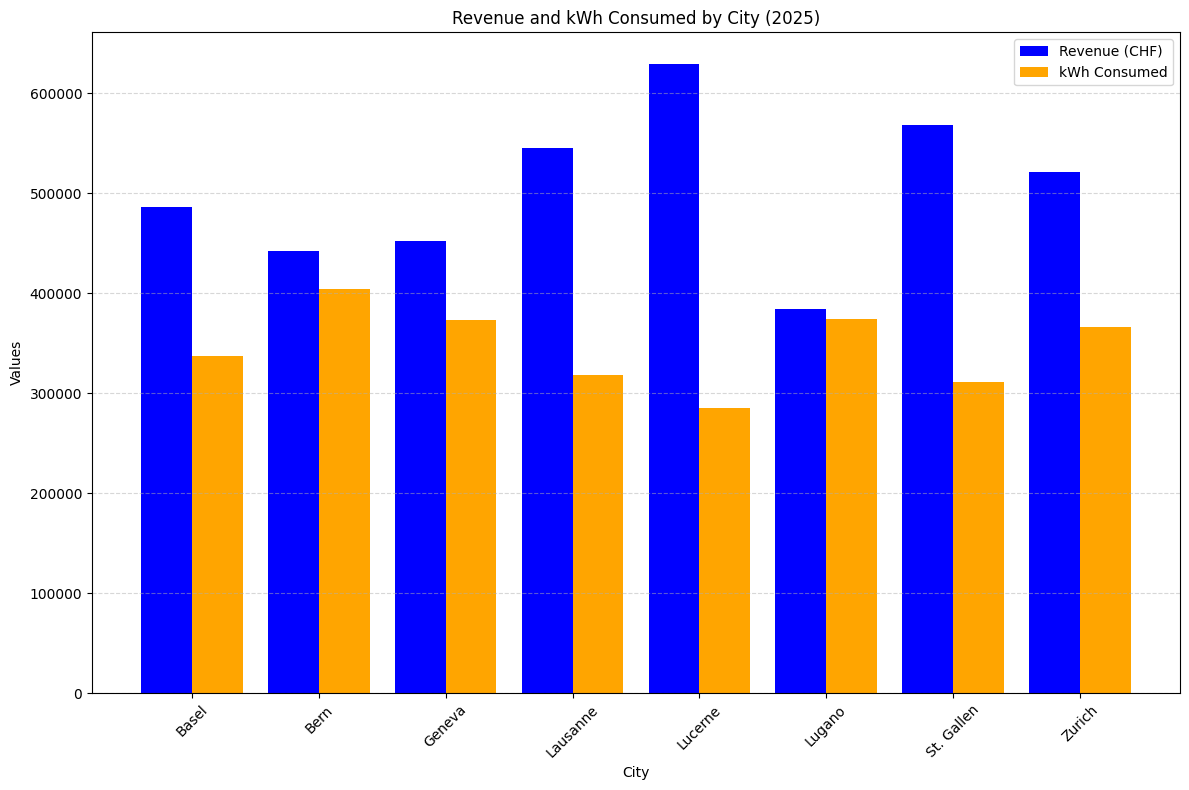

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure DataFrames 2, 3, and 4 exist in the list of DataFrames
if len(dataframes) >= 4:
    payments = dataframes[1]  # DataFrame 2
    chargers = dataframes[2]  # DataFrame 3
    transactions = dataframes[3]  # DataFrame 4

    # Check if all required columns exist in the respective DataFrames
    if 'city' in chargers.columns and 'charger_id' in chargers.columns and \
       'session_id' in transactions.columns and 'charger_id' in transactions.columns and \
       'session_id' in payments.columns and 'amount' in payments.columns and \
       'currency' in payments.columns and 'kWh_consumed' in transactions.columns and \
       'start_time' in transactions.columns and 'end_time' in transactions.columns:
        try:
            # Convert start_time and end_time to datetime
            transactions['start_time'] = pd.to_datetime(transactions['start_time'])
            transactions['end_time'] = pd.to_datetime(transactions['end_time'])

            # Filter transactions to include only those that started and ended in 2025
            transactions_2025 = transactions[
                (transactions['start_time'].dt.year == 2025) &
                (transactions['end_time'].dt.year == 2025)
            ]
            print(f"Transactions in 2025: {len(transactions_2025)}")  # Debugging

            # Merge transactions with payments on 'session_id'
            transactions_with_payments = transactions_2025.merge(payments, on='session_id', how='inner')

            # Filter transactions to include only those with currency CHF
            transactions_chf = transactions_with_payments[transactions_with_payments['currency'] == 'CHF']
            discarded_entries = len(transactions_with_payments) - len(transactions_chf)
            print(f"Number of discarded entries (non-CHF): {discarded_entries}")
            print(f"Transactions with CHF currency: {len(transactions_chf)}")  # Debugging

            # Merge chargers with filtered transactions on 'charger_id'
            combined_df = chargers.merge(transactions_chf, on='charger_id', how='inner')
            print(f"Combined DataFrame (after merging with chargers): {len(combined_df)}")  # Debugging

            # Group by city and calculate total revenue (amount) and total kWh consumed
            city_stats = combined_df.groupby('city')[['amount', 'kWh_consumed']].sum().reset_index()

            # Check if city_stats is empty
            if city_stats.empty:
                print("No data available for the specified filters.")
            else:
                # Plot the grouped bar chart
                plt.figure(figsize=(12, 8))
                bar_width = 0.4  # Width of each bar
                x = range(len(city_stats['city']))  # X-axis positions

                # Plot revenue in CHF
                plt.bar([pos - bar_width / 2 for pos in x], city_stats['amount'], width=bar_width, color='blue', label='Revenue (CHF)')

                # Plot kWh consumed
                plt.bar([pos + bar_width / 2 for pos in x], city_stats['kWh_consumed'], width=bar_width, color='orange', label='kWh Consumed')

                # Add labels and title
                plt.title('Revenue and kWh Consumed by City (2025)')
                plt.xlabel('City')
                plt.ylabel('Values')
                plt.xticks(x, city_stats['city'], rotation=45)  # Set city names as x-axis labels
                plt.legend()
                plt.grid(axis='y', linestyle='--', alpha=0.5)
                plt.tight_layout()
                plt.show()

        except Exception as e:
            print(f"Error creating the plot: {e}")
    else:
        print("Required columns ('city', 'charger_id', 'session_id', 'amount', 'currency', 'kWh_consumed', 'start_time', 'end_time' in DataFrames 2, 3, and 4) are missing.")
else:
    print("DataFrames 2, 3, and 4 do not exist in the list of DataFrames.")

Transactions in 2025: 91876
Number of discarded entries (non-CHF): 0
Transactions with CHF currency: 91876
Combined DataFrame (after merging with chargers): 91876


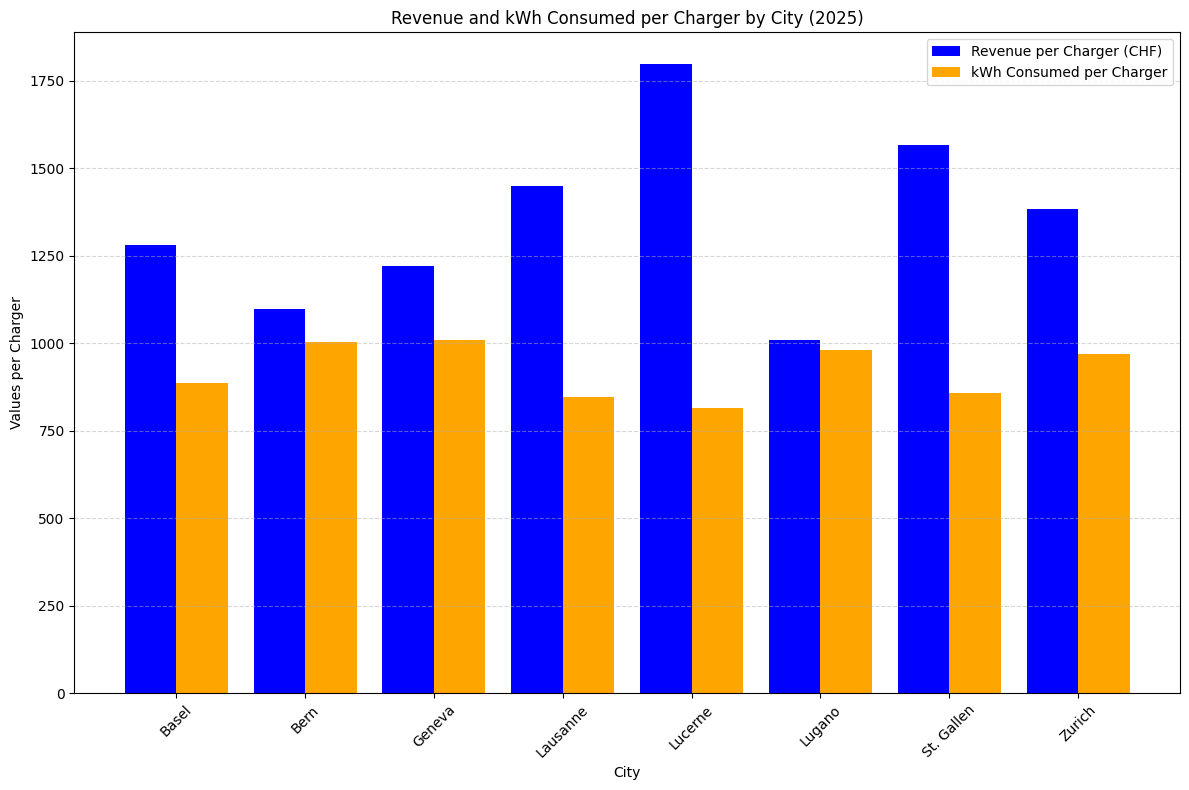

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure DataFrames 2, 3, and 4 exist in the list of DataFrames
if len(dataframes) >= 4:
    payments = dataframes[1]  # DataFrame 2
    chargers = dataframes[2]  # DataFrame 3
    transactions = dataframes[3]  # DataFrame 4

    # Check if all required columns exist in the respective DataFrames
    if 'city' in chargers.columns and 'charger_id' in chargers.columns and \
       'session_id' in transactions.columns and 'charger_id' in transactions.columns and \
       'session_id' in payments.columns and 'amount' in payments.columns and \
       'currency' in payments.columns and 'kWh_consumed' in transactions.columns and \
       'start_time' in transactions.columns and 'end_time' in transactions.columns:
        try:
            # Convert start_time and end_time to datetime
            transactions['start_time'] = pd.to_datetime(transactions['start_time'])
            transactions['end_time'] = pd.to_datetime(transactions['end_time'])

            # Filter transactions to include only those that started and ended in 2025
            transactions_2025 = transactions[
                (transactions['start_time'].dt.year == 2025) &
                (transactions['end_time'].dt.year == 2025)
            ]
            print(f"Transactions in 2025: {len(transactions_2025)}")  # Debugging

            # Merge transactions with payments on 'session_id'
            transactions_with_payments = transactions_2025.merge(payments, on='session_id', how='inner')

            # Filter transactions to include only those with currency CHF
            transactions_chf = transactions_with_payments[transactions_with_payments['currency'] == 'CHF']
            discarded_entries = len(transactions_with_payments) - len(transactions_chf)
            print(f"Number of discarded entries (non-CHF): {discarded_entries}")
            print(f"Transactions with CHF currency: {len(transactions_chf)}")  # Debugging

            # Merge chargers with filtered transactions on 'charger_id'
            combined_df = chargers.merge(transactions_chf, on='charger_id', how='inner')
            print(f"Combined DataFrame (after merging with chargers): {len(combined_df)}")  # Debugging

            # Group by city and calculate total revenue (amount) and total kWh consumed
            city_stats = combined_df.groupby('city')[['amount', 'kWh_consumed']].sum().reset_index()

            # Count the number of chargers per city
            chargers_per_city = chargers.groupby('city')['charger_id'].nunique().reset_index()
            chargers_per_city.columns = ['city', 'num_chargers']

            # Merge city_stats with chargers_per_city to calculate per-charger values
            city_stats = city_stats.merge(chargers_per_city, on='city')
            city_stats['revenue_per_charger'] = city_stats['amount'] / city_stats['num_chargers']
            city_stats['kWh_per_charger'] = city_stats['kWh_consumed'] / city_stats['num_chargers']

            # Check if city_stats is empty
            if city_stats.empty:
                print("No data available for the specified filters.")
            else:
                # Plot the grouped bar chart
                plt.figure(figsize=(12, 8))
                bar_width = 0.4  # Width of each bar
                x = range(len(city_stats['city']))  # X-axis positions

                # Plot revenue per charger
                plt.bar([pos - bar_width / 2 for pos in x], city_stats['revenue_per_charger'], width=bar_width, color='blue', label='Revenue per Charger (CHF)')

                # Plot kWh consumed per charger
                plt.bar([pos + bar_width / 2 for pos in x], city_stats['kWh_per_charger'], width=bar_width, color='orange', label='kWh Consumed per Charger')

                # Add labels and title
                plt.title('Revenue and kWh Consumed per Charger by City (2025)')
                plt.xlabel('City')
                plt.ylabel('Values per Charger')
                plt.xticks(x, city_stats['city'], rotation=45)  # Set city names as x-axis labels
                plt.legend()
                plt.grid(axis='y', linestyle='--', alpha=0.5)
                plt.tight_layout()
                plt.show()

        except Exception as e:
            print(f"Error creating the plot: {e}")
    else:
        print("Required columns ('city', 'charger_id', 'session_id', 'amount', 'currency', 'kWh_consumed', 'start_time', 'end_time' in DataFrames 2, 3, and 4) are missing.")
else:
    print("DataFrames 2, 3, and 4 do not exist in the list of DataFrames.")

## Charger age

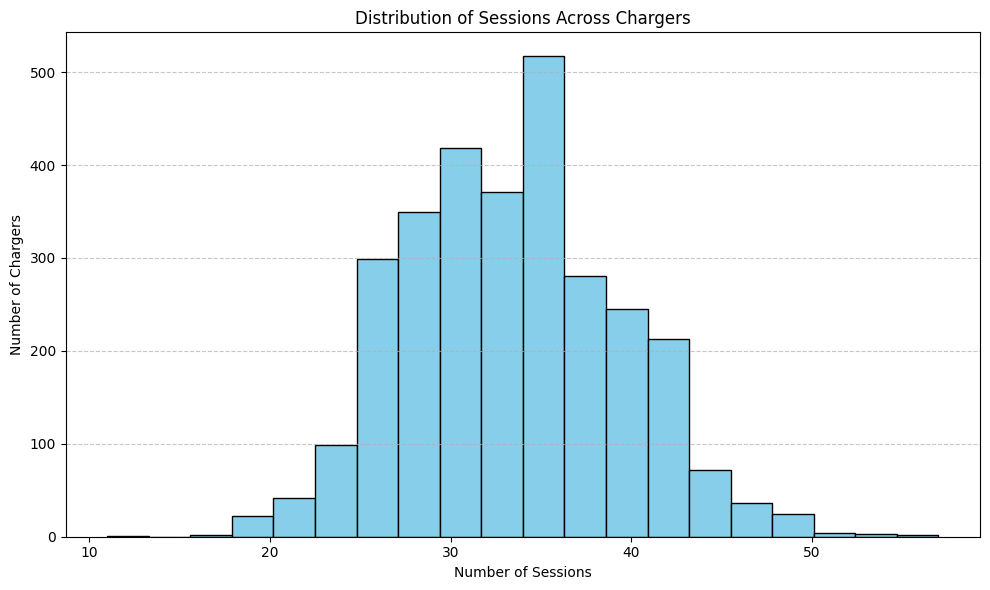

In [67]:
import matplotlib.pyplot as plt

# Ensure DataFrames 3 and 4 exist in the list of DataFrames
if len(dataframes) >= 4:
    chargers = dataframes[2]  # DataFrame 3
    transactions = dataframes[3]  # DataFrame 4

    # Check if both DataFrames have the required columns
    if 'charger_id' in chargers.columns and 'charger_id' in transactions.columns:
        try:
            # Count the number of sessions per charger
            session_counts = transactions['charger_id'].value_counts()

            # Merge session counts with chargers DataFrame to ensure all chargers are included
            chargers_usage = chargers.merge(
                session_counts.rename('session_count'),  # Rename the series to 'session_count'
                left_on='charger_id',
                right_index=True,
                how='left'
            )

            # Fill NaN values for chargers with no sessions
            chargers_usage['session_count'] = chargers_usage['session_count'].fillna(0)

            # Plot the distribution of session counts
            plt.figure(figsize=(10, 6))
            plt.hist(chargers_usage['session_count'], bins=20, color='skyblue', edgecolor='black')
            plt.title('Distribution of Sessions Across Chargers')
            plt.xlabel('Number of Sessions')
            plt.ylabel('Number of Chargers')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error creating the plot: {e}")
    else:
        print("Required columns ('charger_id' in both DataFrames) are missing.")
else:
    print("DataFrames 3 and 4 do not exist in the list of DataFrames.")

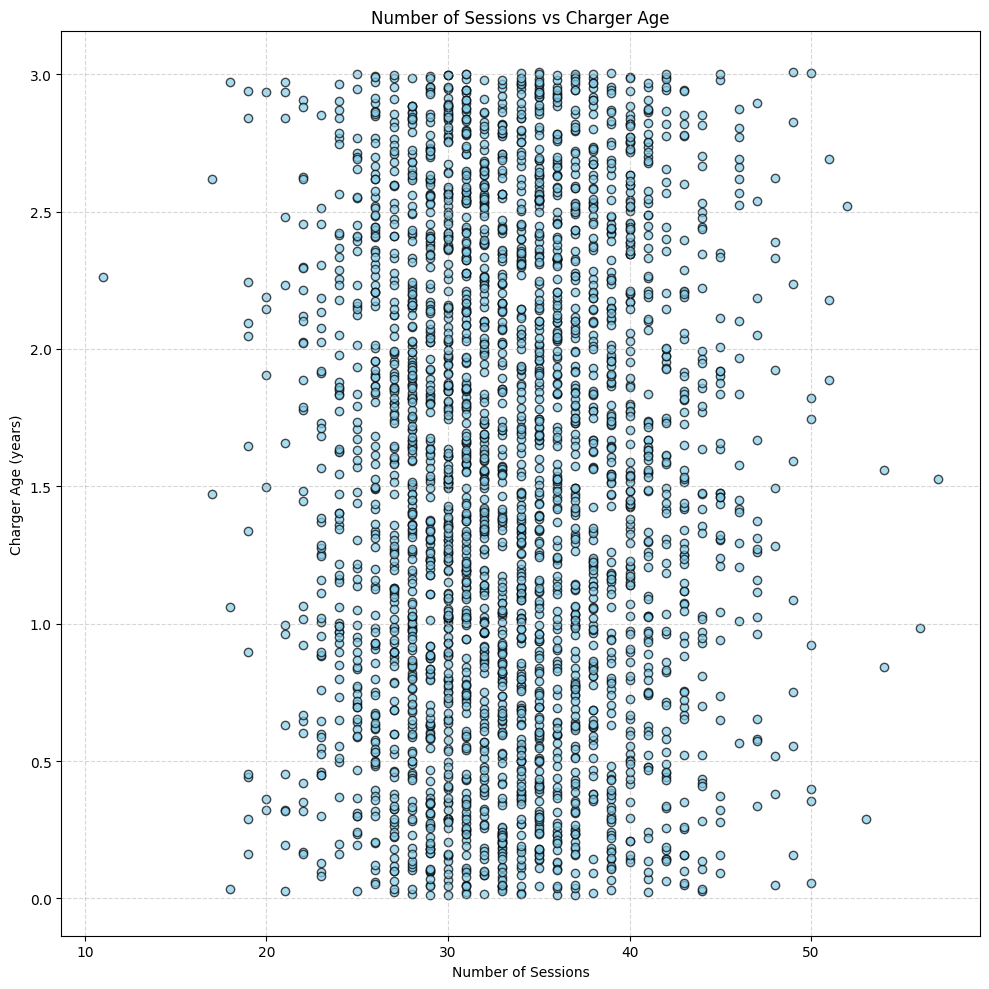

In [68]:
import matplotlib.pyplot as plt
from datetime import datetime
import pytz  # For timezone handling

# Ensure DataFrames 3 and 4 exist in the list of DataFrames
if len(dataframes) >= 4:
    chargers = dataframes[2]  # DataFrame 3
    transactions = dataframes[3]  # DataFrame 4

    # Check if both DataFrames have the required columns
    if 'charger_id' in chargers.columns and 'installed_at' in chargers.columns and 'charger_id' in transactions.columns:
        try:
            # Count the number of sessions per charger
            session_counts = transactions['charger_id'].value_counts()

            # Merge session counts with chargers DataFrame
            chargers_usage = chargers.merge(
                session_counts.rename('session_count'),  # Rename the series to 'session_count'
                left_on='charger_id',
                right_index=True,
                how='left'
            )

            # Fill NaN values for chargers with no sessions
            chargers_usage['session_count'] = chargers_usage['session_count'].fillna(0)

            # Calculate the age of each charger
            chargers_usage['installed_at'] = pd.to_datetime(chargers_usage['installed_at'])
            swiss_timezone = pytz.timezone('Europe/Zurich')  # Set timezone to Switzerland
            now = datetime.now(swiss_timezone)  # Get the current time in Switzerland timezone
            chargers_usage['charger_age'] = (now - chargers_usage['installed_at']).dt.days / 365.25  # Convert to years

            # Plot the scatter plot with inverted axes and more stretched Y-axis
            plt.figure(figsize=(10, 10))  # Increase the height to stretch the Y-axis further
            plt.scatter(chargers_usage['session_count'], chargers_usage['charger_age'], alpha=0.7, color='skyblue', edgecolor='black')
            plt.title('Number of Sessions vs Charger Age')
            plt.xlabel('Number of Sessions')
            plt.ylabel('Charger Age (years)')
            plt.grid(alpha=0.5, linestyle='--')
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error creating the scatter plot: {e}")
    else:
        print("Required columns ('charger_id', 'installed_at' in DataFrame 3 and 'charger_id' in DataFrame 4) are missing.")
else:
    print("DataFrames 3 and 4 do not exist in the list of DataFrames.")

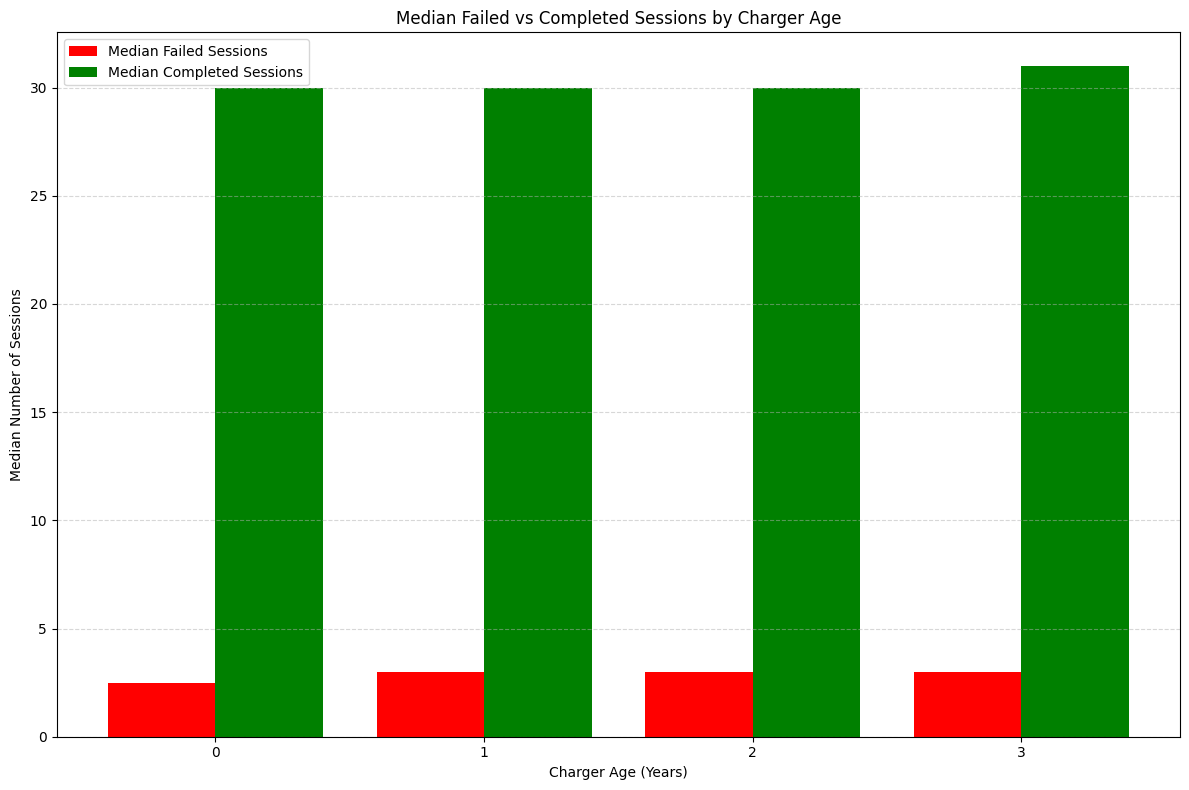

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pytz  # For timezone handling

# Ensure DataFrames 3 and 4 exist in the list of DataFrames
if len(dataframes) >= 4:
    chargers = dataframes[2]  # DataFrame 3
    transactions = dataframes[3]  # DataFrame 4

    # Check if both DataFrames have the required columns
    if 'charger_id' in chargers.columns and 'installed_at' in chargers.columns and 'charger_id' in transactions.columns and 'status' in transactions.columns:
        try:
            # Count the number of sessions (failed and completed) per charger
            session_counts = transactions.groupby(['charger_id', 'status']).size().unstack(fill_value=0)

            # Merge session counts with chargers DataFrame
            chargers_usage = chargers.merge(
                session_counts,  # Merge the session counts
                left_on='charger_id',
                right_index=True,
                how='left'
            )

            # Fill NaN values for chargers with no sessions
            chargers_usage = chargers_usage.fillna(0)

            # Calculate the age of each charger
            chargers_usage['installed_at'] = pd.to_datetime(chargers_usage['installed_at'])
            swiss_timezone = pytz.timezone('Europe/Zurich')  # Set timezone to Switzerland
            now = datetime.now(swiss_timezone)  # Get the current time in Switzerland timezone
            chargers_usage['charger_age'] = (now - chargers_usage['installed_at']).dt.days / 365.25  # Convert to years

            # Round charger age to the nearest year
            chargers_usage['charger_age_years'] = chargers_usage['charger_age'].round()

            # Group by charger age (in years) and calculate the median number of failed and completed sessions
            median_sessions_table = chargers_usage.groupby('charger_age_years')[['failed', 'completed']].median().reset_index()

            # Rename columns for clarity
            median_sessions_table.columns = ['Charger Age (Years)', 'Median Failed Sessions', 'Median Completed Sessions']

            # Plot the bar graph
            plt.figure(figsize=(12, 8))
            bar_width = 0.4  # Width of each bar
            x = median_sessions_table['Charger Age (Years)']  # X-axis values

            # Plot median failed sessions
            plt.bar(x - bar_width / 2, median_sessions_table['Median Failed Sessions'], width=bar_width, color='red', label='Median Failed Sessions')

            # Plot median completed sessions
            plt.bar(x + bar_width / 2, median_sessions_table['Median Completed Sessions'], width=bar_width, color='green', label='Median Completed Sessions')

            # Add labels and title
            plt.title('Median Failed vs Completed Sessions by Charger Age')
            plt.xlabel('Charger Age (Years)')
            plt.ylabel('Median Number of Sessions')
            plt.xticks(x)  # Set x-axis ticks to charger ages
            plt.legend()
            plt.grid(axis='y', linestyle='--', alpha=0.5)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error creating the bar graph: {e}")
    else:
        print("Required columns ('charger_id', 'installed_at', 'status' in DataFrame 3 and 4) are missing.")
else:
    print("DataFrames 3 and 4 do not exist in the list of DataFrames.")

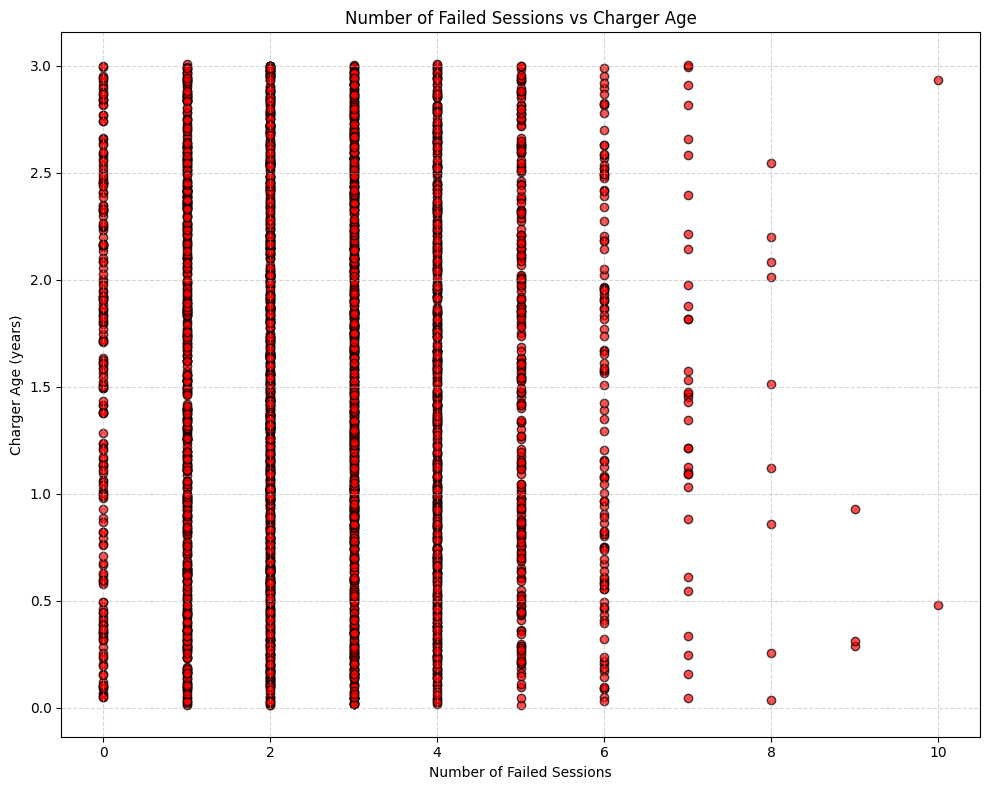

In [70]:
import matplotlib.pyplot as plt
from datetime import datetime
import pytz  # For timezone handling

# Ensure DataFrames 3 and 4 exist in the list of DataFrames
if len(dataframes) >= 4:
    chargers = dataframes[2]  # DataFrame 3
    transactions = dataframes[3]  # DataFrame 4

    # Check if both DataFrames have the required columns
    if 'charger_id' in chargers.columns and 'installed_at' in chargers.columns and 'charger_id' in transactions.columns and 'status' in transactions.columns:
        try:
            # Count the number of failed sessions per charger
            failed_sessions = transactions[transactions['status'] == 'failed']['charger_id'].value_counts()

            # Merge failed session counts with chargers DataFrame
            chargers_usage = chargers.merge(
                failed_sessions.rename('failed_session_count'),  # Rename the series to 'failed_session_count'
                left_on='charger_id',
                right_index=True,
                how='left'
            )

            # Fill NaN values for chargers with no failed sessions
            chargers_usage['failed_session_count'] = chargers_usage['failed_session_count'].fillna(0)

            # Calculate the age of each charger
            chargers_usage['installed_at'] = pd.to_datetime(chargers_usage['installed_at'])
            swiss_timezone = pytz.timezone('Europe/Zurich')  # Set timezone to Switzerland
            now = datetime.now(swiss_timezone)  # Get the current time in Switzerland timezone
            chargers_usage['charger_age'] = (now - chargers_usage['installed_at']).dt.days / 365.25  # Convert to years

            # Plot the scatter plot with only failed sessions
            plt.figure(figsize=(10, 8))
            plt.scatter(chargers_usage['failed_session_count'], chargers_usage['charger_age'], alpha=0.7, color='red', edgecolor='black')
            plt.title('Number of Failed Sessions vs Charger Age')
            plt.xlabel('Number of Failed Sessions')
            plt.ylabel('Charger Age (years)')
            plt.grid(alpha=0.5, linestyle='--')
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error creating the scatter plot: {e}")
    else:
        print("Required columns ('charger_id', 'installed_at', 'status' in DataFrame 3 and 4) are missing.")
else:
    print("DataFrames 3 and 4 do not exist in the list of DataFrames.")

In [71]:
import folium
from folium.plugins import HeatMap
from scipy.stats import zscore
import pandas as pd

# Ensure DataFrame 3 exists in the list of DataFrames
if len(dataframes) >= 3:
    chargers = dataframes[2]  # DataFrame 3 (index 2 in the list)

    # Check if the 'location' column exists in DataFrame 3
    if 'location' in chargers.columns:
        # Ensure the 'location' column contains valid latitude and longitude pairs
        try:
            # Extract 'lat' and 'lon' from the 'location' dictionaries
            chargers['latitude'] = chargers['location'].apply(lambda loc: loc.get('lat') if isinstance(loc, dict) else None)
            chargers['longitude'] = chargers['location'].apply(lambda loc: loc.get('lon') if isinstance(loc, dict) else None)

            # Convert latitude and longitude to numeric types
            chargers['latitude'] = pd.to_numeric(chargers['latitude'], errors='coerce')
            chargers['longitude'] = pd.to_numeric(chargers['longitude'], errors='coerce')

            # Remove rows where latitude or longitude is NaN
            chargers = chargers[chargers['latitude'].notnull() & chargers['longitude'].notnull()]

            # Filter out invalid coordinates (e.g., lat=0 and lon=0)
            chargers = chargers[(chargers['latitude'] >= -90) & (chargers['latitude'] <= 90)]
            chargers = chargers[(chargers['longitude'] >= -180) & (chargers['longitude'] <= 180)]

            # Calculate Z-scores for latitude and longitude
            chargers['zscore_lat'] = zscore(chargers['latitude'])
            chargers['zscore_lon'] = zscore(chargers['longitude'])

            # Define a threshold for Z-scores (number of standard deviations)
            zscore_threshold = 2

            # Filter out outliers based on Z-scores
            df3_filtered = chargers[
                (chargers['zscore_lat'].abs() <= zscore_threshold) &
                (chargers['zscore_lon'].abs() <= zscore_threshold)
            ]

            # Prepare data for the heatmap
            heatmap_data = df3_filtered[['latitude', 'longitude']].values.tolist()

            # Check if heatmap_data is empty
            if not heatmap_data:
                print("No valid data available for the heatmap.")
            else:
                # Create a map
                heatmap_map = folium.Map(zoom_start=10)

                # Fit the map bounds to the data
                bounds = [
                    [df3_filtered['latitude'].min(), df3_filtered['longitude'].min()],
                    [df3_filtered['latitude'].max(), df3_filtered['longitude'].max()]
                ]
                heatmap_map.fit_bounds(bounds)

                # Add the heatmap layer
                HeatMap(heatmap_data, radius=15, blur=10, max_zoom=1).add_to(heatmap_map)

                # Display the heatmap
                print("Heatmap of Charger Locations:")
                display(heatmap_map)

        except Exception as e:
            print(f"Error processing 'location' column: {e}")
    else:
        print("The 'location' column does not exist in DataFrame 3.")
else:
    print("DataFrame 3 does not exist in the list of DataFrames.")

Heatmap of Charger Locations:


## More ideas for plots

- Count of charging sessions against length of charging sessions -> e.g. 40 sessions with a length of 0-20 minutes, 500 session with a length of 1-2h etc
- Locations of chargers with the highest revenue in a specific time frame
- Failed sessions against location or time
- Number of charging sessions or revenue at different times of day
- Odds ratio of session status to city (At which location do sessions fail a lot?)